In [1]:
import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import png
import tensorflow as tf
from numpy import genfromtxt
import pandas as pd

In [2]:
def read_header(infile):
    """Read image header (first 512 bytes)
    """
    h = dict()
    fid = open(infile, 'r+b')
    h['filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
    h['parent_filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
    h['comments1'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
    h['comments2'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
    h['energy_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['config_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['file_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['trans_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scan_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['data_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['date_modified'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 16))
    h['frequency'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['mat_velocity'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['num_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_polarization_channels'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['spare00'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['adc_min_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['adc_max_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['band_width'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['spare01'] = np.fromfile(fid, dtype = np.int16, count = 5)
    h['polarization_type'] = np.fromfile(fid, dtype = np.int16, count = 4)
    h['record_header_size'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['word_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['word_precision'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['min_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['max_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['avg_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['data_scale_factor'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['data_units'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['surf_removal'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['edge_weighting'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['x_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['y_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['z_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['t_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['spare02'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['x_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['scan_orientation'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scan_direction'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['data_storage_order'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scanner_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['x_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['t_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['num_x_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_y_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_z_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_t_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['x_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['date_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
    h['time_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
    h['depth_recon'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['elevation_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['roll_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['azimuth_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['adc_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['spare06'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scanner_radius'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['t_delay'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['range_gate_start'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['range_gate_end'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['ahis_software_version'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['spare_end'] = np.fromfile(fid, dtype = np.float32, count = 10)
    return h

In [3]:
def read_data(infile):
    """Read any of the 4 types of image files, returns a numpy array of the image contents
    """
    extension = os.path.splitext(infile)[1]
    h = read_header(infile)
    nx = int(h['num_x_pts'])
    ny = int(h['num_y_pts'])
    nt = int(h['num_t_pts'])
    fid = open(infile, 'rb')
    fid.seek(512) #skip header
    if extension == '.aps' or extension == '.a3daps':
        if(h['word_type']==7): #float32
            data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)
        elif(h['word_type']==4): #uint16
            data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)
        data = data * h['data_scale_factor'] #scaling factor
        data = data.reshape(nx, ny, nt, order='F').copy() #make N-d image
    elif extension == '.a3d':
        if(h['word_type']==7): #float32
            data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)
        elif(h['word_type']==4): #uint16
            data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)
        data = data * h['data_scale_factor'] #scaling factor
        data = data.reshape(nx, nt, ny, order='F').copy() #make N-d image
    elif extension == '.ahi':
        data = np.fromfile(fid, dtype = np.float32, count = 2* nx * ny * nt)
        data = data.reshape(2, ny, nx, nt, order='F').copy()
        real = data[0,:,:,:].copy()
        imag = data[1,:,:,:].copy()
    fid.close()
    if extension != '.ahi':
        return data
    else:
        return real, imag

In [4]:
def bulk_read_data(image_paths):
    data = []
    for path in image_paths:
        path = "./images/" + path + ".aps"
        data.append(read_data(path))
    return np.stack(data)

In [ ]:
def build_model(mode, labels, data):
    

In [8]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [9]:
# labels = genfromtxt('stage1_labels.csv', delimiter=',')
labels = pd.read_csv('stage1_labels.csv')
test_size = 5
labels['Id'] = labels['Id'].str.split("_", expand=True)[0].str.strip()
test_ids = labels['Id'].unique()[:test_size]
test_labels = labels[labels['Id'].isin(test_ids)]


In [10]:
test_labels = tf.constant(np.reshape(np.array(test_labels["Probability"].tolist()), [test_size,17]))

In [11]:

data = bulk_read_data(test_ids)

In [12]:
image_data = tf.convert_to_tensor(data)

In [13]:
image_data

<tf.Tensor 'Const_1:0' shape=(5, 512, 660, 16) dtype=float32>

In [14]:
#init = tf.initialize_all_variables()
#image_data = tf.convert_to_tensor(image_data)
conv = tf.layers.conv2d(
    inputs=image_data,
    filters=32,
    kernel_size=[5, 5],
    padding="same",
    activation=tf.nn.relu)
#sess.run(init)
sess.run(tf.initialize_all_variables())
#sess.run(tf_filter.eval())
#sess.run(conv)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [15]:
convoluted = sess.run(conv)

In [16]:
convoluted.shape

(5, 512, 660, 32)

In [17]:
image_data.shape

TensorShape([Dimension(5), Dimension(512), Dimension(660), Dimension(16)])

In [18]:
plt.imshow(convoluted[1][:,:,23])

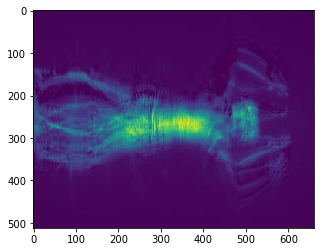

In [19]:
plt.show()

In [20]:
pool1 = tf.layers.max_pooling2d(inputs=conv, pool_size=[2, 2], strides=2)

In [21]:
pooled = sess.run(pool1)

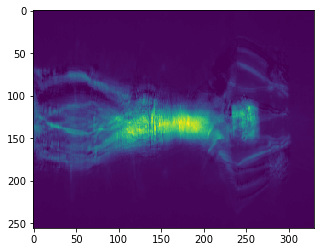

In [22]:
plt.imshow(pooled[1][:,:,23])
plt.show()

In [23]:
pool1

<tf.Tensor 'max_pooling2d/MaxPool:0' shape=(5, 256, 330, 32) dtype=float32>

In [41]:
flat_pool = tf.reshape(pool1, [test_size, -1])

In [42]:
flat_pool.shape

TensorShape([Dimension(5), Dimension(2703360)])

In [43]:
logits = tf.layers.dense(inputs=flat_pool, units=17)

In [44]:
logits.shape

TensorShape([Dimension(5), Dimension(17)])

In [45]:
sess.run(tf.initialize_all_variables())

logited = sess.run(logits)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [35]:
plt.imshow(logited[0][:,:,0])
plt.show()

IndexError: too many indices for array

In [36]:
logited.shape

(2703360, 17)

In [46]:
onehot_labels

<tf.Tensor 'one_hot_1:0' shape=(5, 17, 17) dtype=float32>

In [47]:
onehot_labels = tf.one_hot(indices=tf.cast(test_labels, tf.int32), depth=17)
loss = tf.losses.softmax_cross_entropy(onehot_labels=test_labels, logits=logits)

In [48]:
 predictions = {
      "classes": tf.argmax(
          input=logits, axis=1),
      "probabilities": tf.nn.softmax(
          logits, name="softmax_tensor")}

In [59]:
train_op = tf.contrib.layers.optimize_loss(
        loss=loss,
        global_step=tf.contrib.framework.get_global_step(),
        learning_rate=0.001,
        optimizer="SGD")

In [60]:
mode = tf.contrib.learn.ModeKeys.TRAIN

In [62]:
model = tf.contrib.learn.ModelFnOps(mode=mode, predictions=predictions, loss=loss, train_op=train_op)

In [68]:
model

ModelFnOps(predictions={'classes': <tf.Tensor 'ArgMax:0' shape=(5,) dtype=int64>, 'probabilities': <tf.Tensor 'softmax_tensor:0' shape=(5, 17) dtype=float32>}, loss=<tf.Tensor 'softmax_cross_entropy_loss_2/value:0' shape=() dtype=float32>, train_op=<tf.Operation 'OptimizeLoss/control_dependency' type=Identity>, eval_metric_ops={}, output_alternatives=None, training_chief_hooks=[], training_hooks=[], training_scaffold=None)

In [69]:
mnist_classifier = tf.contrib.learn.Estimator(model_fn=model, model_dir="/tmp/tsa_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f21400a5780>, '_master': '', '_num_ps_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


TypeError: argument of type 'NoneType' is not iterable